# NLP Practical 5 
> 19BCE245 - Aayush Shah

- Explore and understand `Sequence to Sequence` learning (`RNN`, `LSTM`, `GRU` based processing of text data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# !wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2022-03-28 10:00:17--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.3’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-03-28 10:00:17 (30.2 MB/s) - ‘airline-passengers.csv.3’ saved [2180/2180]



In [ ]:
# df = pd.read_csv('auto-insurance.csv')
df = pd.read_csv('airline-passengers.csv')
df.head(15)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


Text(0, 0.5, 'No of passengers')

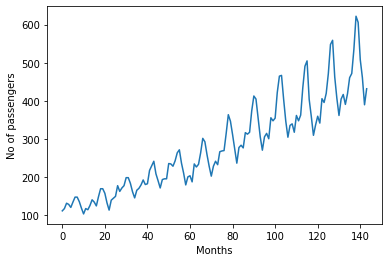

In [ ]:
df.columns =['Month', 'Passengers']
df1 = df.drop(['Month'],axis=1)
dataset = df1.values

plt.plot(dataset)
plt.xlabel("Months")
plt.ylabel("No of passengers")

In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size

train=dataset[:train_size,:]
test=dataset[train_size:,:]
print(train)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [ ]:
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)

In [ ]:
lookback=1
X_train,y_train=getdata(train,lookback)
X_test,y_test=getdata(test,lookback)

In [ ]:
print(X_train)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
print(X_train)

[[[0.01544402]]

 [[0.02702703]]

 [[0.05405405]]

 [[0.04826255]]

 [[0.03281853]]

 [[0.05984556]]

 [[0.08494208]]

 [[0.08494208]]

 [[0.06177606]]

 [[0.02895753]]

 [[0.        ]]

 [[0.02702703]]

 [[0.02123552]]

 [[0.04247104]]

 [[0.07142857]]

 [[0.05984556]]

 [[0.04054054]]

 [[0.08687259]]

 [[0.12741313]]

 [[0.12741313]]

 [[0.1042471 ]]

 [[0.05598456]]

 [[0.01930502]]

 [[0.06949807]]

 [[0.07915058]]

 [[0.08880309]]

 [[0.14285714]]

 [[0.11389961]]

 [[0.13127413]]

 [[0.14285714]]

 [[0.18339768]]

 [[0.18339768]]

 [[0.15444015]]

 [[0.11196911]]

 [[0.08108108]]

 [[0.11969112]]

 [[0.12934363]]

 [[0.14671815]]

 [[0.17181467]]

 [[0.14864865]]

 [[0.15250965]]

 [[0.22007722]]

 [[0.24324324]]

 [[0.26640927]]

 [[0.2027027 ]]

 [[0.16795367]]

 [[0.13127413]]

 [[0.17374517]]

 [[0.17760618]]

 [[0.17760618]]

 [[0.25482625]]

 [[0.25289575]]

 [[0.24131274]]

 [[0.26833977]]

 [[0.30888031]]

 [[0.32432432]]

 [[0.25675676]]

 [[0.20656371]]

 [[0.14671815]

### LSTM

In [ ]:
model1=Sequential()
model1.add(LSTM(5,input_shape=(1,lookback)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred = model1.predict(X_test)
y_test1=scaler.inverse_transform(y_test)
y_pred1=scaler.inverse_transform(y_pred)

Epoch 1/50
106/106 [==============================] - 2s 2ms/step - loss: 0.0658
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 5/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 8/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 9/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 11/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 12/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 13/50
106/106 [====

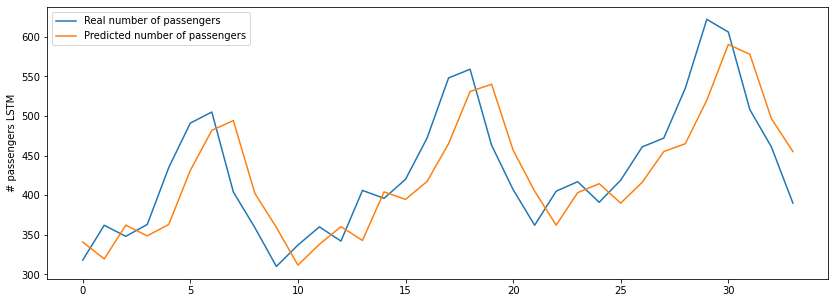

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test1, label = 'Real number of passengers')
plt.plot(y_pred1, label = 'Predicted number of passengers')
plt.ylabel('# passengers LSTM')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(y_test1,y_pred1)

2447.7071476609667

### RNN

In [ ]:
model2=Sequential()
model2.add(SimpleRNN(5,input_shape=(1,lookback)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred=model2.predict(X_test)
y_test2=scaler.inverse_transform(y_test)
y_pred2=scaler.inverse_transform(y_pred)

Epoch 1/50
106/106 [==============================] - 2s 3ms/step - loss: 0.0028
Epoch 2/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 3/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 4/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 5/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 8/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 9/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 10/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 11/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 12/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13/50
106/106 [====

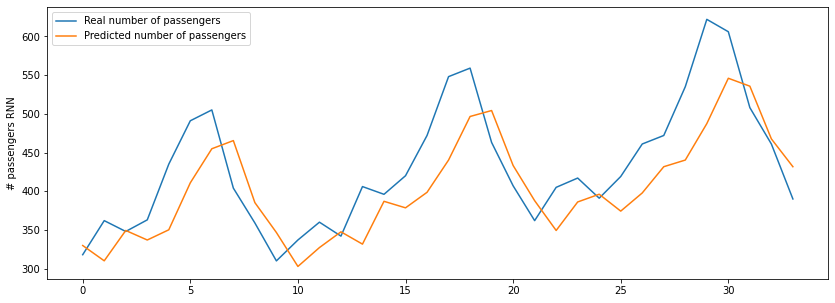

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test2, label = 'Real number of passengers')
plt.plot(y_pred2, label = 'Predicted number of passengers')
plt.ylabel('# passengers RNN')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(y_test2,y_pred2)

3058.500923184486

### GRU

In [ ]:
model3=Sequential()
model3.add(GRU(5,input_shape=(1,lookback)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model3.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred=model3.predict(X_test)
y_test3=scaler.inverse_transform(y_test)
y_pred3=scaler.inverse_transform(y_pred)


Epoch 1/50
106/106 [==============================] - 4s 4ms/step - loss: 0.0242
Epoch 2/50
106/106 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 5/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 8/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 9/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 11/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/50
106/106 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/50
106/106 [====

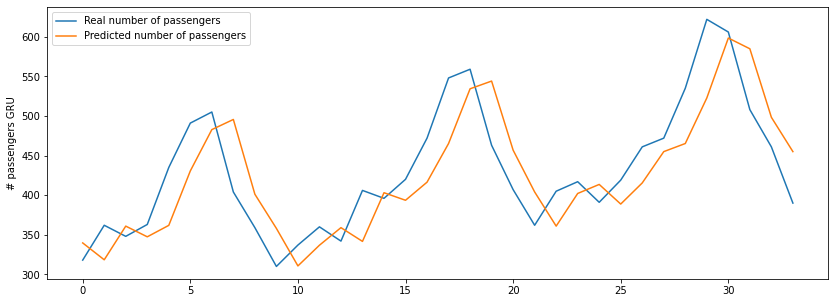

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test3, label = 'Real number of passengers')
plt.plot(y_pred3, label = 'Predicted number of passengers')
plt.ylabel('# passengers GRU')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(y_test3,y_pred3)

2493.8800626861153